# Proyecto4

#### El Deep Learning y el Machine Learning son dos ramas específicas de la Inteligencia Artificial (IA), que están ganando cada vez más relevancia en la era digital. Durante todo el módulo 2, se trabajaron modelos avanzados de Machine Learning (Aprender a interpretarlos: ¿qué predicen y por qué predicen lo que predicen?) 

#### Ahora.............. 

### Exploremos el Proyecto 2: Análisis de mercado inmobiliario con Deep Learning

#### ¿Cómo funciona el Deep Learning?
 
#### Un modelo de Deep Learning está programado para analizar datos continuamente, con una estructura lógica similar a la de un ser humano. Para lograr esta capacidad, el Deep Learning utiliza capas de estructuras algorítmicas, llamadas redes neuronales artificiales. Esta red está inspirada en la red neuronal biológica del cerebro humano. Esto conduce a un proceso de aprendizaje más avanzado que los modelos básicos de Machine Learning.

#### Técnicamente, el Deep Learning es Machine Learning y funciona de la misma manera, pero las capacidades son diferentes. El Deep Learning es una evolución del Machine Learning.

#### Si bien los modelos básicos de Machine Learning están mejorando progresivamente sus funciones, aún necesitan supervisión humana. Es decir, si un algoritmo de IA ofrece una predicción incorrecta, un ser humano tendrá que intervenir y realizar los ajustes necesarios. Sin embargo, con un modelo de Deep Learning, un algoritmo puede determinar por sí mismo si una predicción es incorrecta, a través de su propia red neuronal.

<font color=red>
Para este dataset, se mantienen las mismas premisas y filtros del proyecto 2.
</font>

<font color=green>
Se importa las librerías necesarias para trabajar en la consigna.
</font>

In [1]:
# Tratamiento de datos - Gráficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font color=green>
Se carga el dataset usando las funcionalidades de Pandas. Se imprime cuántas filas y columnas tiene.
</font>

In [2]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
propiedadesProperati = pd.read_csv('properati.csv')
# tupla
tamanoDataset = propiedadesProperati.shape
print('El dataset tiene',tamanoDataset[0],'filas y',tamanoDataset[1],'columnas')

El dataset tiene 146660 filas y 19 columnas


<font color=green>
Check: Eliminación de instancias repetidas
</font>

In [3]:
sin_dup = propiedadesProperati.drop_duplicates()
print(f'Numero de instancias duplicadas', propiedadesProperati.shape[0]-sin_dup.shape[0])
print(f'Numero de instancias del dataset filtrado', sin_dup.shape[0])

Numero de instancias duplicadas 2358
Numero de instancias del dataset filtrado 144302


In [4]:
# Se resetea index
sin_dup = sin_dup.reset_index(drop=True)

<font color=green>
Se realiza los filtros del dataset para tener uno similar al del proyecto 2. Se crea un nuevo dataframe con las siguientes premisas.
</font>

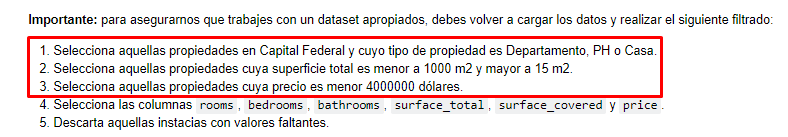

In [5]:
propiedades =  ['Departamento', 'PH','Casa']

In [6]:
df2 = sin_dup[(sin_dup.l2 == 'Capital Federal') & (sin_dup.property_type.isin(propiedades))
         & (sin_dup.surface_total <= 1000) & (sin_dup.surface_total >= 15) & (sin_dup.price <= 4000000)]

In [7]:
print(df2.shape)

(80967, 19)


In [8]:
# Se resetea index
df2 = df2.reset_index(drop=True)

<font color=green>
Se eliminan aquellas columnas que no me 'aportan' a mi estudio estadistico
</font>

<font color=green>
Para este proyecto, se opta por mantener en el dataset las columnas de 'l3' que son los barrios en la ciudad de Buenos Aires y 'property_type', con el fín de mejorar el modelo que predice el precio.
</font>

In [9]:
df_O =  df2.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2',
                             'currency','title', 'description','operation_type'], axis=1, inplace= False)
df_O.shape

(80967, 8)

In [10]:
df_O.isna().sum()

l3                   0
rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    503
price                0
property_type        0
dtype: int64

### Manejo de Outliers

<font color=green>
Se construye función para quitar los outliers del dataset (uso de método intercuartil), de modo que, se va a trabajar en un rango donde se concentran la mayoría de muestras
</font>

In [11]:
Q1 = df_O.quantile(0.25)
Q3 = df_O.quantile(0.75)
IQR = Q3 - Q1

In [12]:
no_outliers = df_O[(Q1 - 1.5*IQR < df_O) &  (df_O < Q3 + 1.5*IQR)]
outliers = df_O[~((Q1 - 1.5*IQR >= df_O) |  (df_O >= Q3 + 1.5*IQR)).any(axis=1)]

In [13]:
print(no_outliers.shape)
print(outliers.shape)

(80967, 8)
(70252, 8)


In [14]:
# Se resetea index
outliers = outliers.reset_index(drop=True)

<font color=green>
En la siguiente representación gráfica se visualizan para rooms, bedrooms, bathrooms, surface_total, surface_covered y price, la distribución de los datos por debajo del límite inferior (cuartil 1) y por encima del límite superior (cuartil 3). Para price, aunque se ven algunos datos atípicos, se puede obtener rápidamente una idea del rango de valores comunes y limitantes de la distribución. Por ejemplo, la mediana de esta variable es aproximadamente de 160000 USD (la línea que divide la caja del diagrama).
</font>

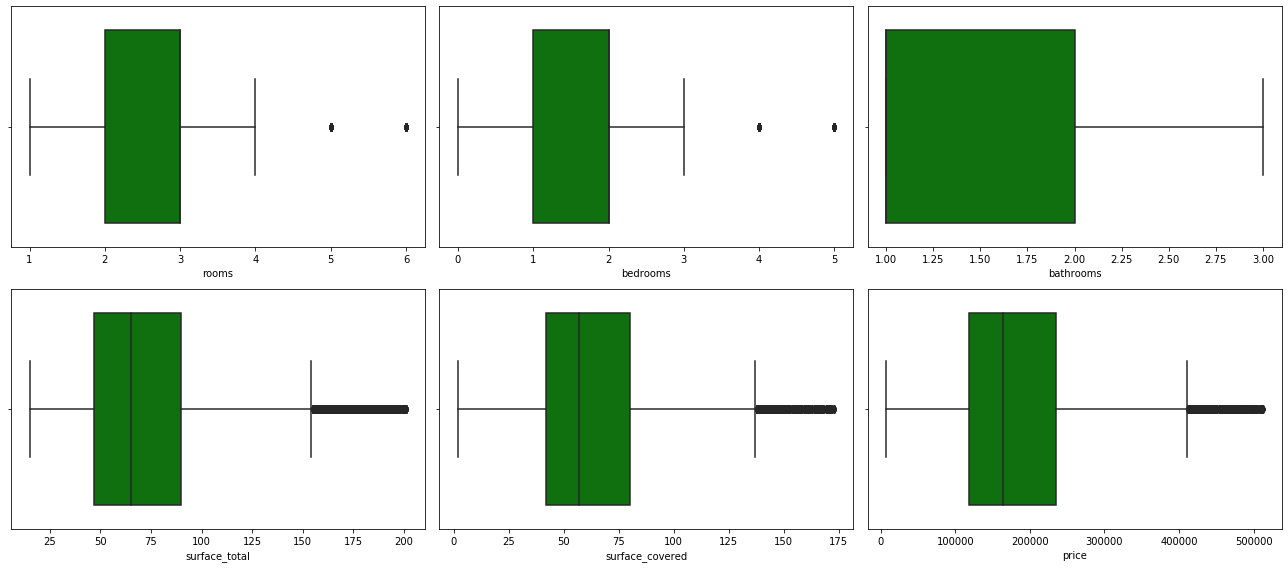

In [15]:
plt.figure(figsize = (6*3,8))
    
plt.subplot(2,3,1)
sns.boxplot(outliers.rooms, color = 'green')

plt.subplot(2,3,2)
sns.boxplot(outliers.bedrooms, color = 'green')

plt.subplot(2,3,3)
sns.boxplot(outliers.bathrooms, color = 'green')

plt.subplot(2,3,4)
sns.boxplot(outliers.surface_total, color = 'green')

plt.subplot(2,3,5)
sns.boxplot(outliers.surface_covered, color = 'green')

plt.subplot(2,3,6)
sns.boxplot(outliers.price, color = 'green')

plt.tight_layout()
# plt.savefig('Retiro_outliers_Proy2.png', dpi = 300)
plt.show()

In [16]:
# Existen datos null en algunas columnas
outliers.isna().sum()

l3                   0
rooms                0
bedrooms             0
bathrooms          772
surface_total        0
surface_covered    456
price                0
property_type        0
dtype: int64

### Imputación de valores faltantes

<font color=green>
Una de las premisas del proyecto 1 es que surface_covered no debe ser mayor a surface_total. En el proyecto 1 se eliminaron estas instancias, en este caso se van a intercambiar los datos entre las categorías.
</font>

In [17]:
# Se copia dataset sin outliers
df_noNaN = outliers.copy()

In [18]:
df_noNaN.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,70252.000000,70252.000000,69480.000000,70252.000000,69796.000000,70252.000000
mean,2.734954,1.792248,1.348474,73.134743,64.480171,186532.679867
std,1.003111,0.842772,0.567786,34.961827,29.048797,92761.998077
min,1.000000,0.000000,1.000000,15.000000,2.000000,7500.000000
25%,2.000000,1.000000,1.000000,47.000000,42.000000,118000.000000
50%,3.000000,2.000000,1.000000,65.000000,57.000000,164000.000000
75%,3.000000,2.000000,2.000000,90.000000,80.000000,235000.000000
max,6.000000,5.000000,3.000000,201.000000,173.000000,512299.000000


<font color=green>
Se reemplazan los datos null. Para 'bathrooms' se imputará con vecinos cercanos.
</font>

In [19]:
from sklearn.impute import KNNImputer

#imp = SimpleImputer(missing_values=np.nan,strategy='median')
imp = KNNImputer(n_neighbors=2)
df_noNaN['bathrooms'] = np.round(imp.fit_transform(df_noNaN[['bathrooms']]),0)

<font color=green>
Para 'surface_covered' se usará el promedio de su categoría agrupada en tipo de propiedad.
</font>

In [20]:
valor_medio_surfaceC = df_noNaN.groupby('property_type')['surface_covered'].mean()

In [21]:
valor_medio_surfaceC = dict(valor_medio_surfaceC)
valor_medio_surfaceC

{'Casa': 113.78457446808511,
 'Departamento': 61.77945431658792,
 'PH': 80.75460434396037}

In [22]:
df_noNaN['surface_covered'] = df_noNaN.surface_covered.fillna(df_noNaN.property_type.map(valor_medio_surfaceC))

In [23]:
condicionD = df_noNaN.loc[df_noNaN.surface_total < df_noNaN.surface_covered]
len(condicionD)

818

In [24]:
condicionD[['surface_total', 'surface_covered']].head()

,surface_total,surface_covered
435,35.0,61.779454
514,43.0,44.000000
553,65.0,66.000000
743,44.0,45.000000
815,78.0,79.000000


<font color=green>
Existen 818 instancias donde la superficie cubierta es mayor a la superficie total. Se procede a intercambiar estas filas en el dataset de estudio.
</font>

In [25]:
df_noNaN.loc[condicionD.index, 'surface_total'] = condicionD.surface_covered
df_noNaN.loc[condicionD.index, 'surface_covered'] = condicionD.surface_total

In [26]:
condicionDD = df_noNaN.loc[df_noNaN.surface_total < df_noNaN.surface_covered]
len(condicionDD)

0

<font color=green>
Finalmente se confirma que no existen instancias donde la superficie cubierta es mayor a la superficie total.
</font>

In [27]:
listaIndex = [435, 514, 553, 743, 815]

In [28]:
df_noNaN[['surface_total', 'surface_covered']][df_noNaN.index.isin(listaIndex)]

,surface_total,surface_covered
435,61.779454,35.0
514,44.000000,43.0
553,66.000000,65.0
743,45.000000,44.0
815,79.000000,78.0


In [29]:
# Se revisa nuevamente los valores faltantes
df_noNaN.isna().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

### Encoding

<font color=blue>
'Property_type' entra como variable de entrenamiento al modelo con el fín de mejorar la predicción de precio.
</font

<font color=green>
Usando LabelEncoder de Scikit-learn podemos transformar nuestras variables categóricas en numéricas sin pasar por variables dummies. Luego, vamos a utilizar OneHotEncoder para transformar las categorías numéricas en categorías binarias.
</font

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
 
df_enc = df_noNaN.copy()

In [31]:
df_enc.isna().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [32]:
# Llamamos al algoritmo
le_prop_type = LabelEncoder()
# Lo fiteamos con las categorias que tenemos en nuestro dataset.
le_prop_type.fit(df_enc['property_type'])

LabelEncoder()

In [33]:
# Estas son las categorias que eligio el algoritmo. Les asignara un numero a cada categoria, 
# yendo de izquierda a derecha [recordemos que python cuenta desde 0]
le_prop_type.classes_

array(['Casa', 'Departamento', 'PH'], dtype=object)

In [34]:
#Transformamos la categoria "property_type" en numeros.
cat_prop_type = le_prop_type.transform(df_enc['property_type'])

[2 2 2 ... 2 2 1]


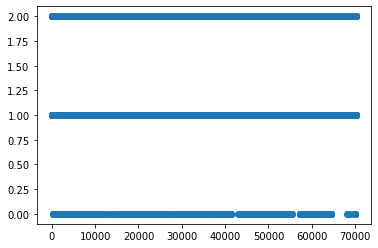

In [35]:
#Les proponemos formas de visualizar que hizo sckit-learn
print(cat_prop_type)
plt.plot(cat_prop_type,'o')

In [36]:
# Actualizamos el viejo dataset
df_enc.loc[:,'property_type_category'] = cat_prop_type

<font color=green>
Ahora vamos a transformar las categorías numéricas que acabamos de definir, en binarias. De lo contrario, el algoritmo de ML que vayamos a usar las interpretaria como variables categoricas ordinales [y no lo son!].
</font

In [37]:
# creating instance of one-hot-encoder

enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df_enc[['property_type_category']]).toarray())
# merge with main df bridge_df on key values
df_enc = df_enc.join(enc_df)
df_enc.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,property_type_category,0,1,2
0,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2,0.0,0.0,1.0
1,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2,0.0,0.0,1.0
2,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,2,0.0,0.0,1.0
3,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2,0.0,0.0,1.0
4,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,2,0.0,0.0,1.0


In [38]:
df_enc.rename(columns={0:'Casa',1:'Departamento',2:'PH'}, inplace=True)
df_enc.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,property_type_category,Casa,Departamento,PH
0,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2,0.0,0.0,1.0
1,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2,0.0,0.0,1.0
2,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,2,0.0,0.0,1.0
3,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2,0.0,0.0,1.0
4,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,2,0.0,0.0,1.0


<font color=blue>
Ahora entra el 'l3' entra como variable de entrenamiento al modelo con el fín de mejorar la predicción de precio.
</font

<font color=green>
Usando LabelEncoder de Scikit-learn podemos transformar nuestras variables categóricas en numéricas sin pasar por variables dummies. Luego, vamos a utilizar OneHotEncoder para transformar las categorías numéricas en categorías binarias.
</font

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
 
(df_enc['l3']).head()

0           Boedo
1         Palermo
2         Palermo
3    Villa Crespo
4    Villa Crespo
Name: l3, dtype: object

In [40]:
# Llamamos al algoritmo
le_prop_type2 = LabelEncoder()
# Lo fiteamos con las categorias que tenemos en nuestro dataset.
le_prop_type2.fit(df_enc['l3'])

LabelEncoder()

In [41]:
# Estas son las categorias que eligio el algoritmo. Les asignara un numero a cada categoria, 
# yendo de izquierda a derecha [recordemos que python cuenta desde 0]
le_prop_type2.classes_

array(['Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Urquiza', 'Villa del Parque'], dtype=object)

In [42]:
#Transformamos la categoria "l3" en numeros.
cat_prop_type2 = le_prop_type2.transform(df_enc['l3'])

[ 8 26 26 ... 26 26 26]


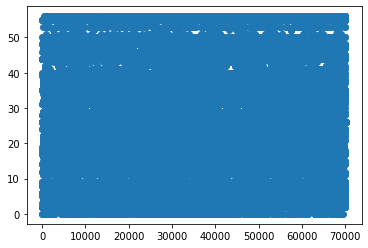

In [43]:
#Les proponemos formas de visualizar que hizo sckit-learn
print(cat_prop_type2)
plt.plot(cat_prop_type2,'o')

In [44]:
# Actualizamos el viejo dataset
df_enc.loc[:,'l3_category'] = cat_prop_type2

<font color=green>
Ahora vamos a transformar las categorías numéricas que acabamos de definir, en binarias. De lo contrario, el algoritmo de ML que vayamos a usar las interpretaria como variables categoricas ordinales [y no lo son!].
</font

In [45]:
# creating instance of one-hot-encoder

enc2 = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df2 = pd.DataFrame(enc2.fit_transform(df_enc[['l3']]).toarray())
# merge with main df bridge_df on key values
df_enc = df_enc.join(enc_df2)
df_enc.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,property_type_category,Casa,...,47,48,49,50,51,52,53,54,55,56
0,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color=green>
En total son 57 barrios, se cambia en nombre de la categoría nominal a una referencia genérica. Por ejemplo b1 corresponde a barrio 1
</font

In [46]:
df_enc.rename(columns={0:'b1',1:'b2',2:'b3',3:'b4',4:'b5',5:'b6',6:'b7',7:'b8',8:'b9',9:'b10',10:'b11',
                     11:'b12',12:'b13',13:'b14',14:'b15',15:'b16',16:'b17',17:'b18',18:'b19',19:'b20',20:'b21',
                     21:'b22',22:'b23',23:'b24',24:'b25',25:'b26',26:'b27',27:'b28',28:'b29',29:'b30',30:'b31',
                     31:'b32',32:'b33',33:'b34',34:'b35',35:'b36',36:'b37',37:'b38',38:'b39',39:'b40',40:'b41',
                     41:'b42',42:'b43',43:'b44',44:'b45',45:'b46',46:'b47',47:'b48',48:'b49',49:'b50',50:'b51',
                     51:'b52',52:'b53',53:'b54',54:'b55',55:'b56',56:'b57'}, inplace=True)

<font color=green>
Se eliminan las columnas base del encodeo. De tal manera, me quedo con las categorías necesarias para continuar los siguientes modelamientos.
</font

In [47]:
# Nombres columnas
df_end = df_enc.drop(['l3', 'property_type', 'property_type_category','l3_category'], axis = 1) 
df_end.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,PH,b1,...,b48,b49,b50,b51,b52,b53,b54,b55,b56,b57
0,2.0,1.0,2.0,70.0,58.0,159000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1.0,45.0,45.0,125000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,1.0,85.0,50.0,295000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,1.0,56.0,56.0,150000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,70.0,70.0,159500.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Nombres columnas
print(df_end.columns)

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'Casa', 'Departamento', 'PH', 'b1', 'b2', 'b3', 'b4', 'b5',
       'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15', 'b16',
       'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26',
       'b27', 'b28', 'b29', 'b30', 'b31', 'b32', 'b33', 'b34', 'b35', 'b36',
       'b37', 'b38', 'b39', 'b40', 'b41', 'b42', 'b43', 'b44', 'b45', 'b46',
       'b47', 'b48', 'b49', 'b50', 'b51', 'b52', 'b53', 'b54', 'b55', 'b56',
       'b57'],
      dtype='object')


In [49]:
df_end.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
                  ..
b53                0
b54                0
b55                0
b56                0
b57                0
Length: 66, dtype: int64

In [50]:
print(df_end.shape)

(70252, 66)


<font color=green>
Checkpoint. Tamaño de dataset 70252 filas y 66 columnas
</font>

In [51]:
df_end.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,PH,b1,...,b48,b49,b50,b51,b52,b53,b54,b55,b56,b57
0,2.0,1.0,2.0,70.0,58.0,159000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1.0,45.0,45.0,125000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,1.0,85.0,50.0,295000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,1.0,56.0,56.0,150000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,70.0,70.0,159500.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color=green>
Ahora se divide el set de datos en un set de entrenamiento y otro de pruebas.

El set de pruebas se usará en la evaluacion final del modelo.
</font>

In [52]:
train_dataset = df_end.sample(frac=0.8,random_state=0)
test_dataset = df_end.drop(train_dataset.index)

<font color=green>
Se revisa rápidamente la distribución conjunta de un par de columnas del set de entrenamiento. En la siguiente gráfica, las variables de surface_covered, surface_total y price tiene una mayor relación entre sí ya que la mayor concentración de datos se presenta en esos bloques.
</font>

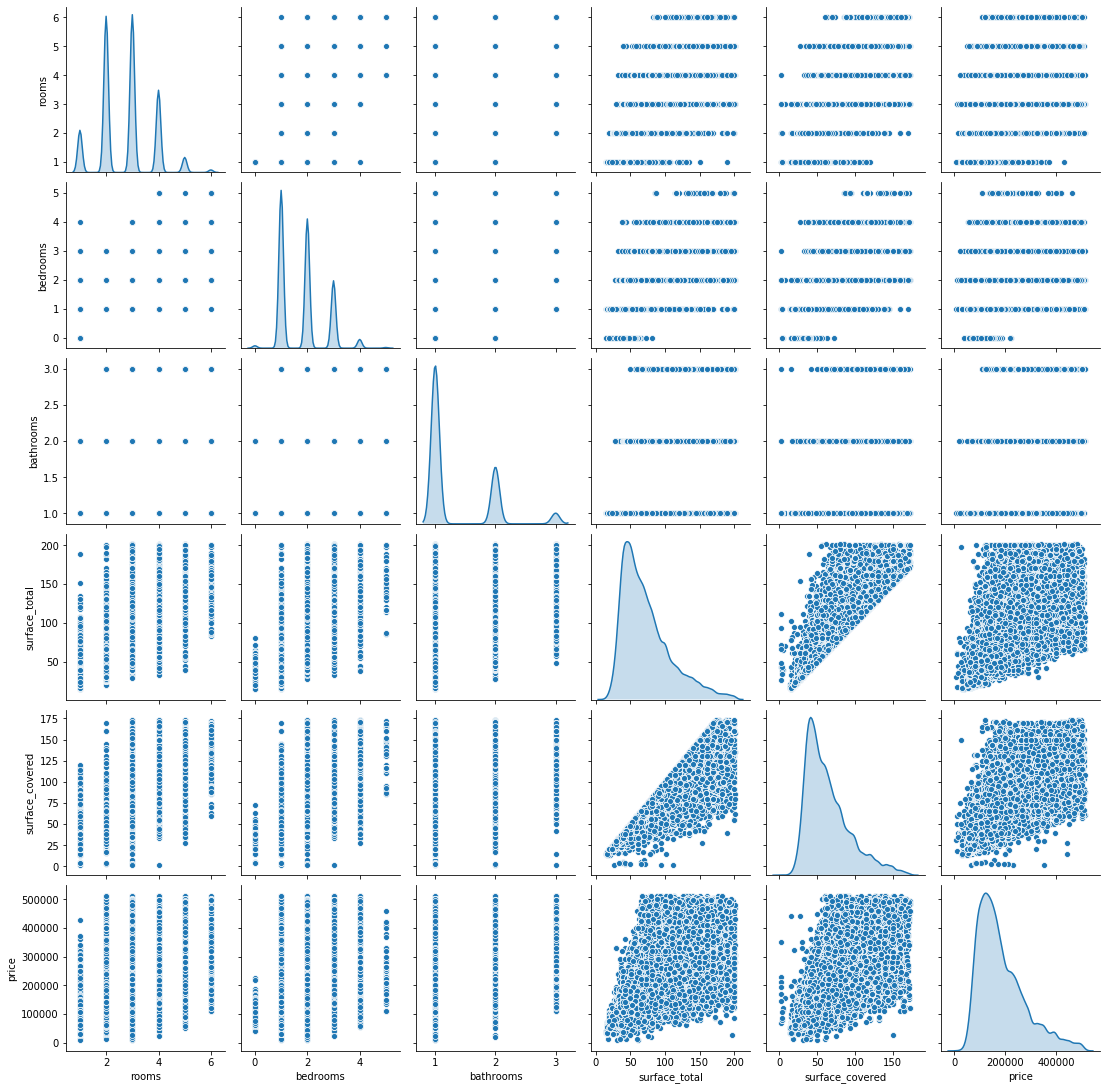

In [53]:
sns.pairplot(train_dataset[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]], diag_kind="kde")

<font color=green>
También se revisa las estadisticas generales.
</font>

In [54]:
train_stats = train_dataset.describe()
train_stats.pop("price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
rooms,56202.0,2.733977,1.003115,1.0,2.0,3.0,3.0,6.0
bedrooms,56202.0,1.791894,0.842227,0.0,1.0,2.0,2.0,5.0
bathrooms,56202.0,1.346233,0.566523,1.0,1.0,1.0,2.0,3.0
surface_total,56202.0,73.238538,34.902309,15.0,47.0,65.0,90.0,201.0
surface_covered,56202.0,64.351067,28.898732,2.0,42.0,57.0,80.0,173.0
...,...,...,...,...,...,...,...,...
b53,56202.0,0.000356,0.018861,0.0,0.0,0.0,0.0,1.0
b54,56202.0,0.004092,0.063841,0.0,0.0,0.0,0.0,1.0
b55,56202.0,0.000623,0.024947,0.0,0.0,0.0,0.0,1.0
b56,56202.0,0.039322,0.194363,0.0,0.0,0.0,0.0,1.0


<font color=green>
Se separa el valor objetivo, o la etiqueta "price" de las caracteristicas.
</font>

In [55]:
train_labels = train_dataset.pop('price')
test_labels = test_dataset.pop('price')

<font color=green>
Es una buena práctica normalizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo * podría * converger sin normalización de características, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.
</font>

<font color=green>
Estos datos normalizados es lo que usaré para entrenar el modelo.
</font>

In [56]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

<font color=green>
Se construye el modelo. Aquí, se utilizará un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que creará un segundo modelo, más adelante.
</font>

In [57]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

<font color=green>
Se construye el modelo. Aquí, se utilizará un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que creará un segundo modelo, más adelante.
</font>

<font color=blue>
¿Qué es TensorFlow?
</font>

<font color=blue>
Es una librería de código abierto desarrollada por Google cuya finalidad es extender el uso del deep learning a un rango de tareas muy amplio. TensorFlow está programado en C++ y Python, ¡Y con APIs disponibles para los usuarios de R!
</font>

<font color=blue>
Los modelos matemáticos utilizados en TensorFlow son redes neuronales, que en función de la arquitectura de capas y neuronas que la conforman se podrá modelizar desde un simple modelo de regresión hasta una arquitectura mucho más compleja de machine learning. Todo dependerá del nivel de dificultad del problema en cuestión.
</font>

In [58]:
import tensorflow as tf

In [59]:
from tensorflow import keras
from tensorflow.keras import layers

<font color=green>
Se construye el modelo y se ve el resumen.
</font>

In [60]:
model = build_model()

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4224      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 8,449
Trainable params: 8,449
Non-trainable params: 0
_________________________________________________________________


<font color=green>
Ahora se prueba el modelo. Se toma un lote de ejemplos 10 de los datos de entrenamiento y se llama a model.predict en él.
</font>

In [62]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.56163585],
       [ 0.33708206],
       [ 0.44981852],
       [-0.22879694],
       [-0.02023071],
       [ 0.60354066],
       [-0.25179955],
       [ 0.31804326],
       [ 0.38299918],
       [ 0.3751306 ]], dtype=float32)

<font color=green>
Parece estar funcionando, y produce un resultado de la forma y tipo esperados.
</font>

<font color=green>
Se entrena el modelo durante 2000 épocas y se registra la precisión de entrenamiento y validación en el objeto history.
</font>

In [63]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

<font color=green>
Se visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto history.
</font>

In [64]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1995,1.340033e+09,25440.689453,1.340032e+09,1.512182e+09,27174.908203,1.512182e+09,1995
1996,1.340653e+09,25456.066406,1.340654e+09,1.512468e+09,27030.972656,1.512468e+09,1996
1997,1.340502e+09,25438.064453,1.340500e+09,1.508937e+09,27071.048828,1.508937e+09,1997
1998,1.340503e+09,25450.740234,1.340502e+09,1.513203e+09,27047.464844,1.513202e+09,1998
1999,1.340121e+09,25448.277344,1.340121e+09,1.507401e+09,27040.837891,1.507401e+09,1999


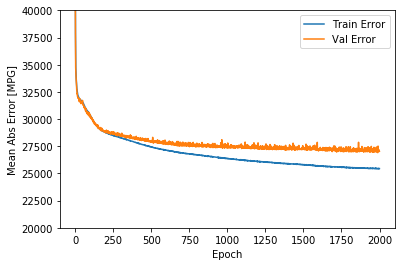

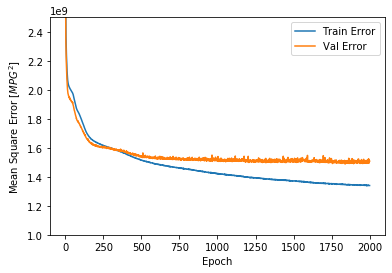

In [65]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([20000,40000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([1000000000,2500000000])
  plt.legend()
  plt.show()


plot_history(history)

<font color=green>
Este gráfico muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 500 épocas. Actualicemos la llamada model.fit para detener automáticamente el entrenamiento cuando el puntaje de validación no mejore. Utilizaremos una * devolución de llamada de EarlyStopping * que pruebe una condición de entrenamiento para cada época. Si transcurre una cantidad determinada de épocas sin mostrar mejoría, entonces detiene automáticamente el entrenamiento.
</font>


....................................................................................................
....................................................................................................
.......................

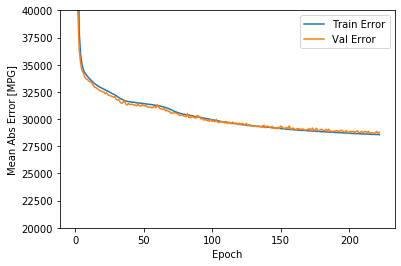

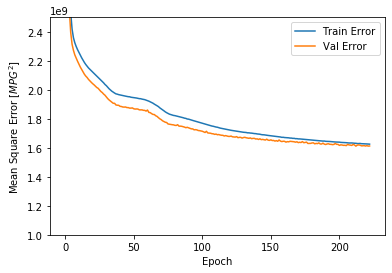

In [66]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

<font color=green>
El gráfico muestra que en el conjunto de validación, el error promedio generalmente es de alrededor de +/- 30000 MPG.
</font>

<font color=green>
Veamos qué tan bien generaliza el modelo al usar el conjunto ** test **, que no usamos al entrenar el modelo. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real.
</font>

In [67]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

14050/14050 - 0s - loss: 1642127140.5506 - mae: 28956.8887 - mse: 1642126976.0000
Testing set Mean Abs Error: 28956.89 MPG


<font color=green>
Finalmente, predigo los valores de MPG utilizando datos en el conjunto de pruebas:
</font>

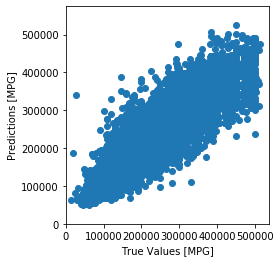

In [68]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

<font color=green>
Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.
</font>

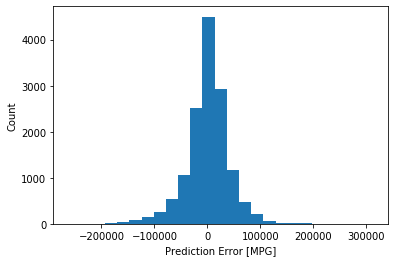

In [69]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

<font color=green>
El histograma tiene forma gaussiana, confirmando una buena predicción del modelo.
</font>

### Conclusiones

#### 1. Resultados previos del proyecto 2 (machine learning) respecto al proyecto 4 (deep learning).

<img src="resultadosAll.png">

#### De todos los modelos machine learning que probé en el proyecto 2, el modelo XGBOOST con hiperparámetros optimizados entregó los menores errores MAE y MSE e inclusive mejor, al modelo del proyecto 4 usando deep learning.

#### 2. Independientemente de los resultados, deep learning es la mejor opción para este dataset. El proceso de aprendizaje en deep learning se llama profundo porque la estructura de redes neuronales artificiales se compone de varias capas de entrada, salida y ocultas. Para el proyecto 4, yo trabajé con 2 capas ocultas y una capa de salida. Esto conduce a que mientras haya más capas escondidas, más compleja e inteligente es la red neuronal y mejores resultados tendrán las predicciones, pero igualmente es mucho más complicado idear un modelo así. 


#### 3. La necesidad para entrenar esas complejas redes de neuronas requiere aumentar la capacidad de procesamiento. En este punto una de las mejoras llevadas a cabo estos años ha sido el uso de GPUs para realizar estos trabajos de forma más eficiente, lo cual ha ahorrado la necesidad de disponer de gran cantidad de ordenadores para realizar los cálculos.